# Preprocessing

In [28]:
import pandas as pd

data = pd.read_csv('../data/hotel_bookings.csv')

In [29]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [31]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [32]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [33]:
data_preprocessed = data.copy()

# change type of children into int
data_preprocessed['children'] = data['children'].fillna(-1).astype(int)
data_preprocessed['children'] = [None if x == -1 else x for x in data_preprocessed['children']]

month_dict = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
data_preprocessed['arrival_date_month'] = data_preprocessed['arrival_date_month'].map(month_dict)

# data_preprocessed.drop(['agent', 'company'], axis=1, inplace = True)

data_preprocessed = pd.get_dummies(data_preprocessed, columns=['hotel'], drop_first=True)
data_preprocessed = pd.get_dummies(data_preprocessed, columns=['meal'], drop_first=True)
data_preprocessed = pd.get_dummies(data_preprocessed, columns=['country'], drop_first=True)
data_preprocessed = pd.get_dummies(data_preprocessed, columns=['market_segment'], drop_first=True)
data_preprocessed = pd.get_dummies(data_preprocessed, columns=['distribution_channel'], drop_first=True)

data_preprocessed['room_attribution'] = (data_preprocessed['reserved_room_type'] == data_preprocessed['assigned_room_type'])
data_preprocessed.drop(['reserved_room_type', 'assigned_room_type'], axis=1, inplace=True)

data_preprocessed = pd.get_dummies(data_preprocessed, columns=['deposit_type'], drop_first=True)
data_preprocessed = pd.get_dummies(data_preprocessed, columns=['customer_type'], drop_first=True)
data_preprocessed = pd.get_dummies(data_preprocessed, columns=['reservation_status'], drop_first=True)

data_preprocessed.drop(['reservation_status_date'], axis=1, inplace=True)

In [34]:
data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Columns: 221 entries, is_canceled to reservation_status_No-Show
dtypes: bool(200), float64(4), int64(17)
memory usage: 41.9 MB


In [35]:
data_preprocessed.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,distribution_channel_TA/TO,distribution_channel_Undefined,room_attribution,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show
0,0,342,2015,7,27,1,0,0,2,0.0,...,False,False,True,False,False,False,True,False,True,False
1,0,737,2015,7,27,1,0,0,2,0.0,...,False,False,True,False,False,False,True,False,True,False
2,0,7,2015,7,27,1,0,1,1,0.0,...,False,False,False,False,False,False,True,False,True,False
3,0,13,2015,7,27,1,0,1,1,0.0,...,False,False,True,False,False,False,True,False,True,False
4,0,14,2015,7,27,1,0,2,2,0.0,...,True,False,True,False,False,False,True,False,True,False


In [36]:
data_preprocessed.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,6.552483,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,...,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,3.090619,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,...,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,4.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,7.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,9.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,12.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,...,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# EDA

In [37]:
correlation = data_preprocessed.drop('is_canceled', axis=1).corrwith(data_preprocessed['is_canceled'])
correlation = correlation.sort_values(ascending=False)
print(correlation)

deposit_type_Non Refund         0.481457
country_PRT                     0.336122
lead_time                       0.293123
room_attribution                0.247770
market_segment_Groups           0.221859
                                  ...   
distribution_channel_Direct    -0.151620
market_segment_Direct          -0.154390
required_car_parking_spaces    -0.195498
total_of_special_requests      -0.234658
reservation_status_Check-Out   -1.000000
Length: 220, dtype: float64


In [39]:
data_preprocessed.drop(['reservation_status_Check-Out'], axis=1, inplace=True)

In [40]:
df_input = data_preprocessed.drop(['is_canceled'], axis=1)
df_output = data_preprocessed['is_canceled']

<h1>Random Forest Classifier
</h1>

## Split data

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_input, df_output, test_size=0.2, random_state=42)

## Training

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

grid_rf = {'max_depth': list(range(10, 200, 10))}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=grid_rf, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train);

In [48]:
best_params = grid_search.best_params_
print(best_params) # {'max_depth': 100}

{'max_depth': 100}


## Results

In [49]:
best_rf = RandomForestClassifier(max_depth=best_params['max_depth'], random_state=42)
best_rf.fit(X_train, y_train);

KeyError: 'n_estimators'

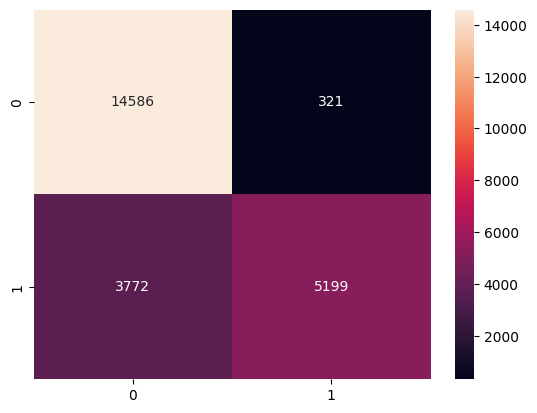

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = best_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

<h1>METRICAS</h1>

<h5>Accuracy: Muestra cuántas predicciones en total fueron correctas. Es una buena medida cuando las clases están balanceadas pero puede ser engañosa cuando hay un desbalance significativo entre las clases.</h5>
<h5>Recall: Especialmente importante cuando los falsos negativos son más críticos que los falsos positivos. Por ejemplo, en la detección de enfermedades sería más perjudicial no detectar una enfermedad (falso negativo) que diagnosticarla por error (falso positivo).</h5>
<h5>Precision: Importante cuando los falsos positivos son más problemáticos que los falsos negativos. Por ejemplo, en el filtrado de spam, podría ser más problemático marcar un correo electrónico legítimo como spam (falso positivo) que no marcar un spam (falso negativo).</h5>
<h5>F1 Score: Combina la precisión y el recall en una sola métrica. Es útil cuando necesitas una medida que tenga en cuenta tanto los falsos positivos como los falsos negativos.</h5>

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 score: {f1:.3f}')

Accuracy: 0.829
Precision: 0.942
Recall: 0.580
F1 score: 0.718
